In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pumpkins = pd.read_csv("../data/US-pumpkins.csv")
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [3]:
column_to_keep = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, column_to_keep]

In [4]:
price = (pumpkins["Low Price"] + pumpkins["High Price"])/2
month = pd.DatetimeIndex(pumpkins["Date"]).month

In [5]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

In [6]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Text(0, 0.5, 'Pumpkin Price')

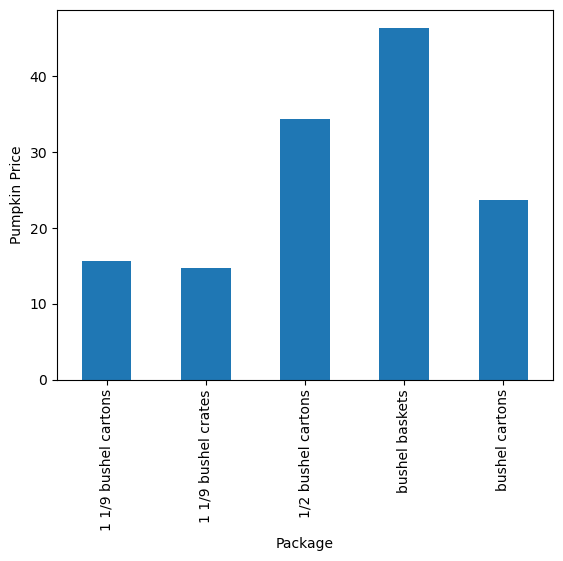

In [7]:
new_pumpkins.groupby(['Package'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [34]:
pumpkins_by_month_package = new_pumpkins.groupby(['Package',"Month"])['Price'].mean().reset_index()
pivot_df = pumpkins_by_month_package.pivot(index='Month', columns='Package', values='Price')


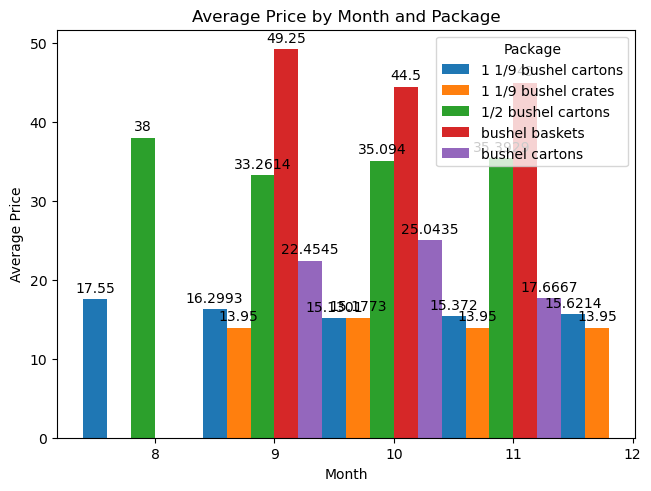

In [38]:
fig, ax = plt.subplots(layout='constrained')

# Define the number of months and the number of packages
months = pivot_df.index
packages = pivot_df.columns


# Define the positions for the groups and bars
bar_width = 0.2
index = np.arange(len(months))

# Plot each package as a bar
for i, package in enumerate(packages):
    offset = (i - len(packages)/2) * bar_width
    rects = ax.bar(index + offset, pivot_df[package], bar_width, label=package)
    ax.bar_label(rects, padding=3)


# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Month and Package')
ax.set_xticks(index)
ax.set_xticklabels(months)
ax.legend(title='Package')

# Display the plot
plt.show()